# 공간 분석과 시각화

공간 자료 분석과 시각화를 실제 자료를 이용하여 방법을 학습합니다.

## 화재데이터를 이용한 기초그래프

앞에서 연도, 시군구별, 사망자수, 부상자수에 대해 가장 높은 지역, 혹은 여름, 겨울의 출동횟수 차이를 비교를 하였다. 또한 이를 수치로 비교하였기에 하나의 값, 혹은 관측값에 대해서만 확인을 하였다.

이러한 내용을 한꺼번에 비교를 하고 싶을때도 있다. 이럴때 가장 많이 사용하는 방법이 시각화이다. 즉, 시각화는 많은 정보를 그림으로 나타내어 한번에 그 정보들을 확인할 수 있게 만들어준다. 파이썬에서는 그래프를 그리기 위해 `matplotlib`패키지를 이용한다.

하지만 코랩에서는 기본적으로 한국어를 지원하지 않기 때문에 한국어 폰트를 설치를 해줘야 한다. 이를 설치하기 위해 아래의 코드를 실행시킨다.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

위 코드는 코랩에 나눔폰트를 설치해주는 코드이다. 이를 실행하고, 상단에 `런타임 > 세션 다시 시작` 을 클릭한다.

그 후, 파이썬에서 나눔폰트를 사용한다는 의미로 `plt.rcParams`를 이용한다.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumBarunGothic'

## 데이터 읽기

- `pandas`패키지를 이용하여 `practice_dat` 엑셀파일을 읽는다.

In [ ]:
final_dat = pd.read_csv("https://raw.githubusercontent.com/UOS-Bigdata/lab_fire_seoul/main/data/practice_dat.csv")
final_dat.head()

,화재발생연도,시군구,사망자수,부상자수,재산피해금액,총출동횟수,출동횟수_여름,출동횟수_겨울
0,2017,강남구,0,11,1565258,502,120,129
1,2017,강동구,0,12,418593,269,73,63
2,2017,강북구,0,6,339146,186,41,51
3,2017,강서구,3,22,706871,364,81,89
4,2017,관악구,3,20,654690,286,69,82


- 이 데이터를 이용하여 기본 그래프의 기본인 막대 그래프, 선 그래프, 산점도, 파이 차트 4가지를 소개한다.

## 막대 그래프

### 2021년 시군구별 사망자 수
- 앞에서 2021년에 사망자수, 부상자수, 재산피해금액, 총출동횟수가 가장 높은 지역은 강북구, 성북구, 중구, 강남구임을 확인했었는데, 이를 막대그래프로 확인해보자.

- 위 데이터는 이미 연도별, 시군구별로 변수들의 총 합을 계산해놓은 데이터이다. 그러므로 2021년의 데이터만 추출해보자.

In [ ]:
tmp_ind = final_dat["화재발생연도"] == 2021
sub_dat = final_dat.loc[tmp_ind, :]
sub_dat.head()

,화재발생연도,시군구,사망자수,부상자수,재산피해금액,총출동횟수,출동횟수_여름,출동횟수_겨울
100,2021,강남구,2,15,1354949,391,91,112
101,2021,강동구,1,12,346741,211,45,56
102,2021,강북구,5,14,410205,146,38,29
103,2021,강서구,2,12,559614,223,50,61
104,2021,관악구,2,17,562294,259,54,74


- 그래프를 그리기위해, `figure`함수를 이용하여 그래프의 크기를 정합니다. 이후, `bar`함수를 이용해 x축에는 `시군구` 변수, y축에는 `사망자수`변수를 넣고 그래프를 생성합니다.

  - plt.title : 그래프에서 제목을 결정하는 함수
  - plt.xlabel : x축의 이름을 결정하는 함수
  - plt.ylabel : y축의 이름을 결정하는 함수
  - plt.show() : 그림을 출력해주는 함수

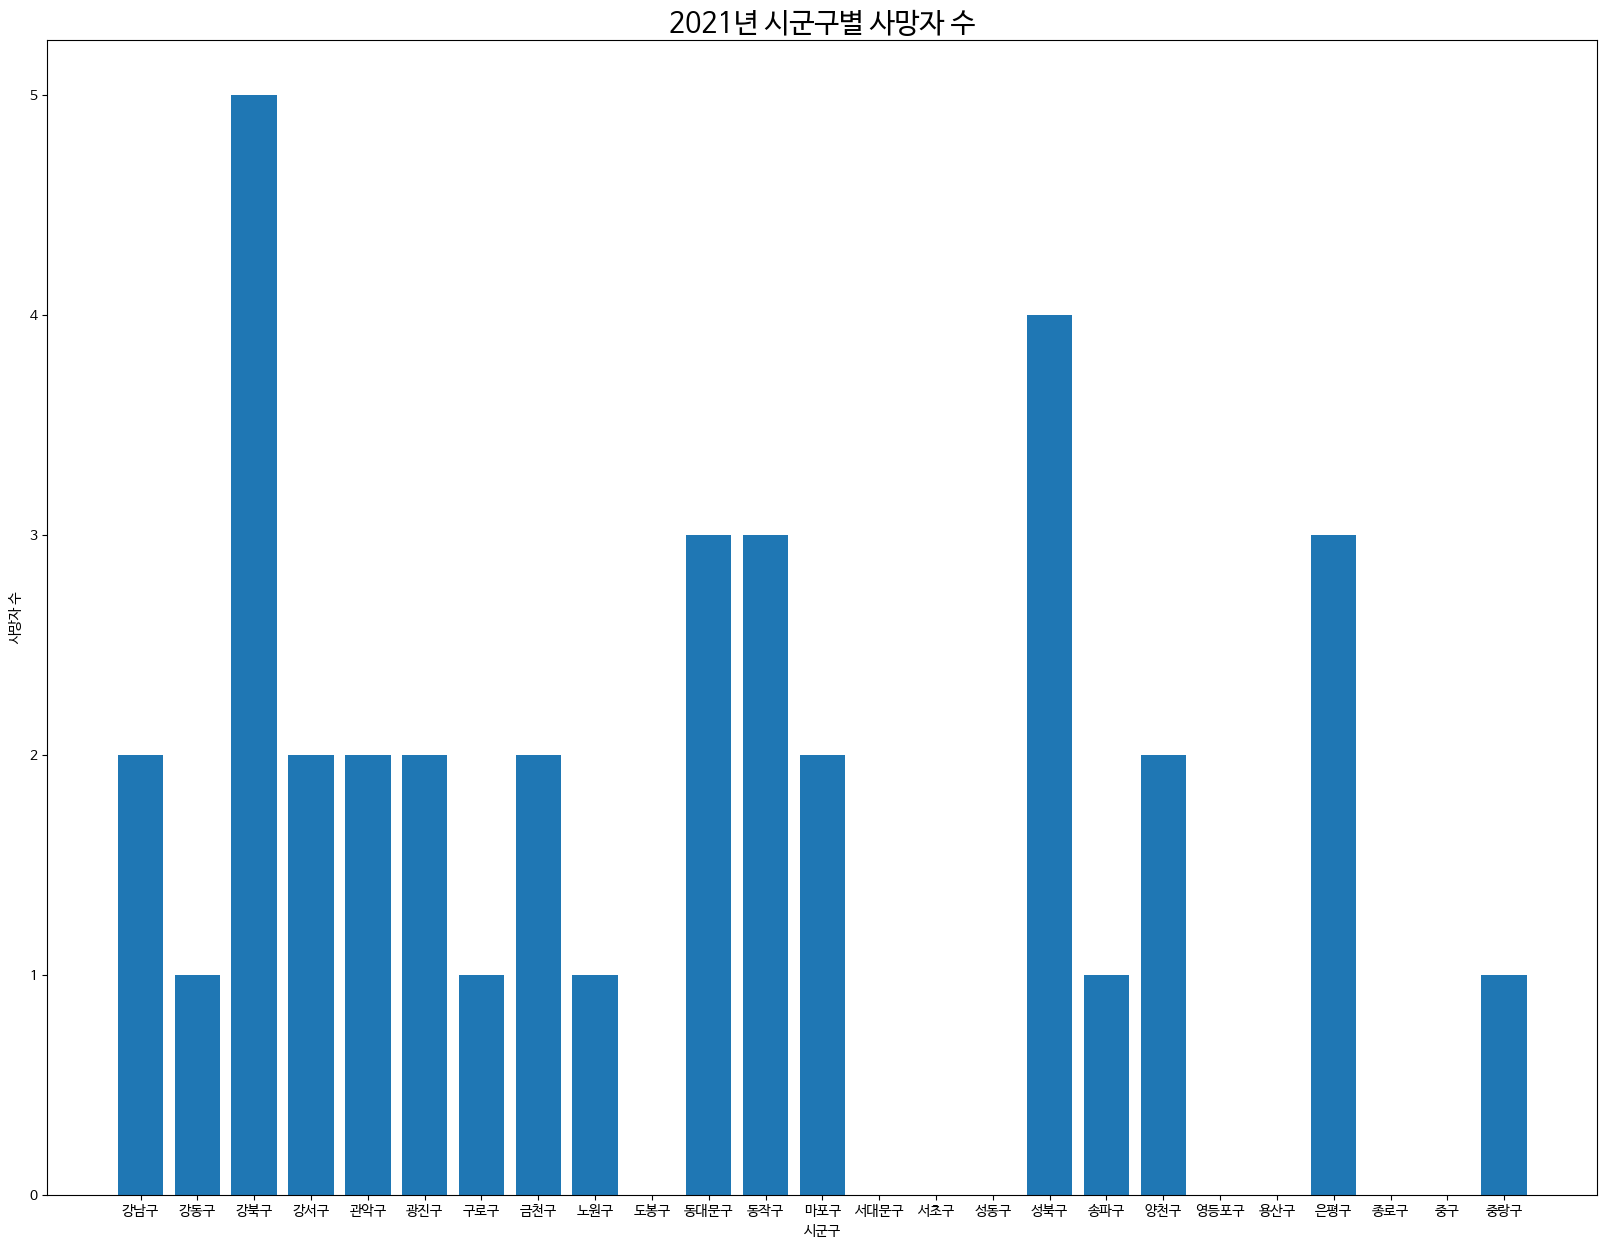

In [ ]:
fig = plt.figure(figsize = (20, 15))
plt.bar("시군구", "사망자수", data = sub_dat)

plt.title("2021년 시군구별 사망자 수", fontsize = 20) ## 그림 제목
plt.xlabel("시군구")
plt.ylabel("사망자 수")

plt.show()

- 앞서 확인한 결과처럼 강북구에서 가장 사망자수가 가장 높다는 것을 알수 있다. 추가적으로 성북구가 4명으로 두 번째, 은평구, 동대문구, 동작구들이 3명으로 3번째로 높다는 것을 확인 할 수 있다.

- 같은 방법으로 부상자수, 재산피해금액, 총 출동횟수를 각각 막대그래프로 시각화한 결과는 아래와 같다.

### 2021년 시군구별 부상자 수

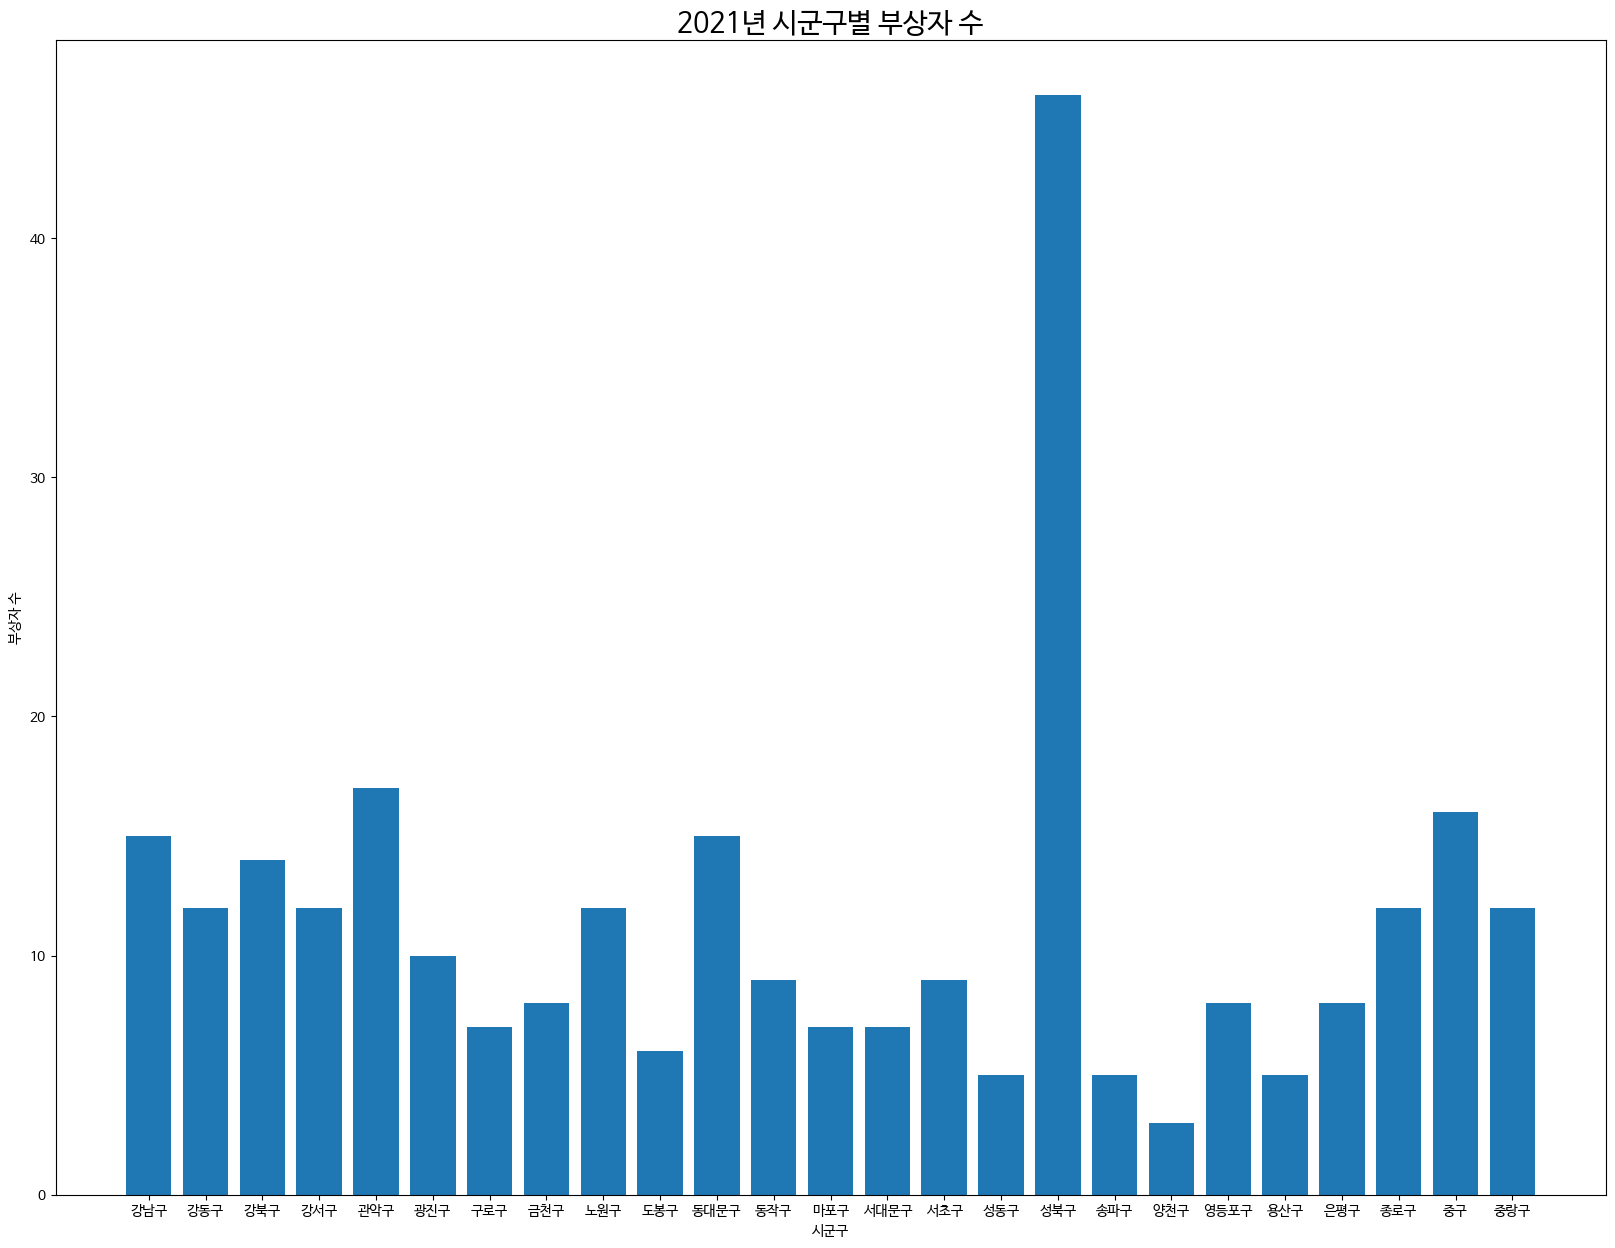

In [ ]:
fig = plt.figure(figsize = (20, 15))
plt.bar("시군구", "부상자수", data = sub_dat)

plt.title("2021년 시군구별 부상자 수", fontsize = 20)
plt.xlabel("시군구")
plt.ylabel("부상자 수")

plt.show()

### 2021년 시군구별 재산피해금액

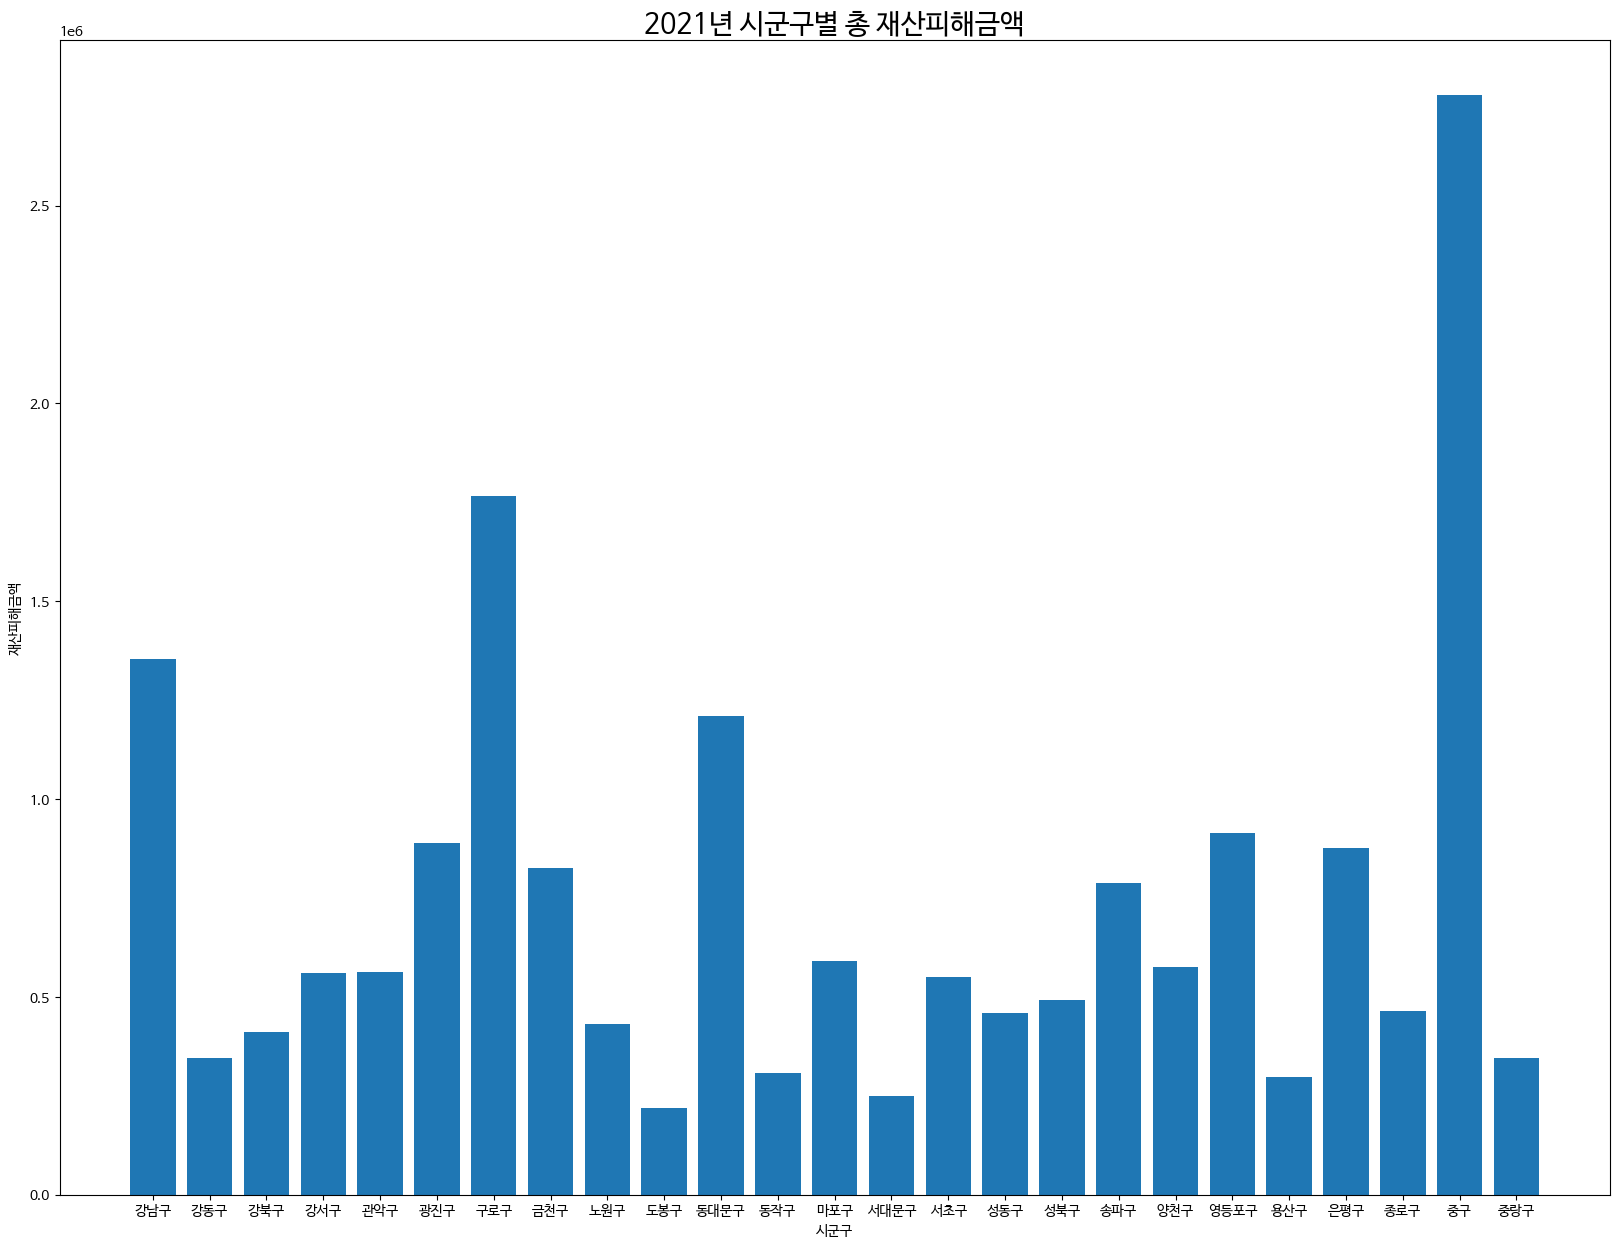

In [ ]:
fig = plt.figure(figsize = (20, 15))
plt.bar("시군구", "재산피해금액", data = sub_dat)

plt.title("2021년 시군구별 총 재산피해금액",fontsize = 20)
plt.xlabel("시군구")
plt.ylabel("재산피해금액")

plt.show()

### 2021년 시군구별 총 출동횟수

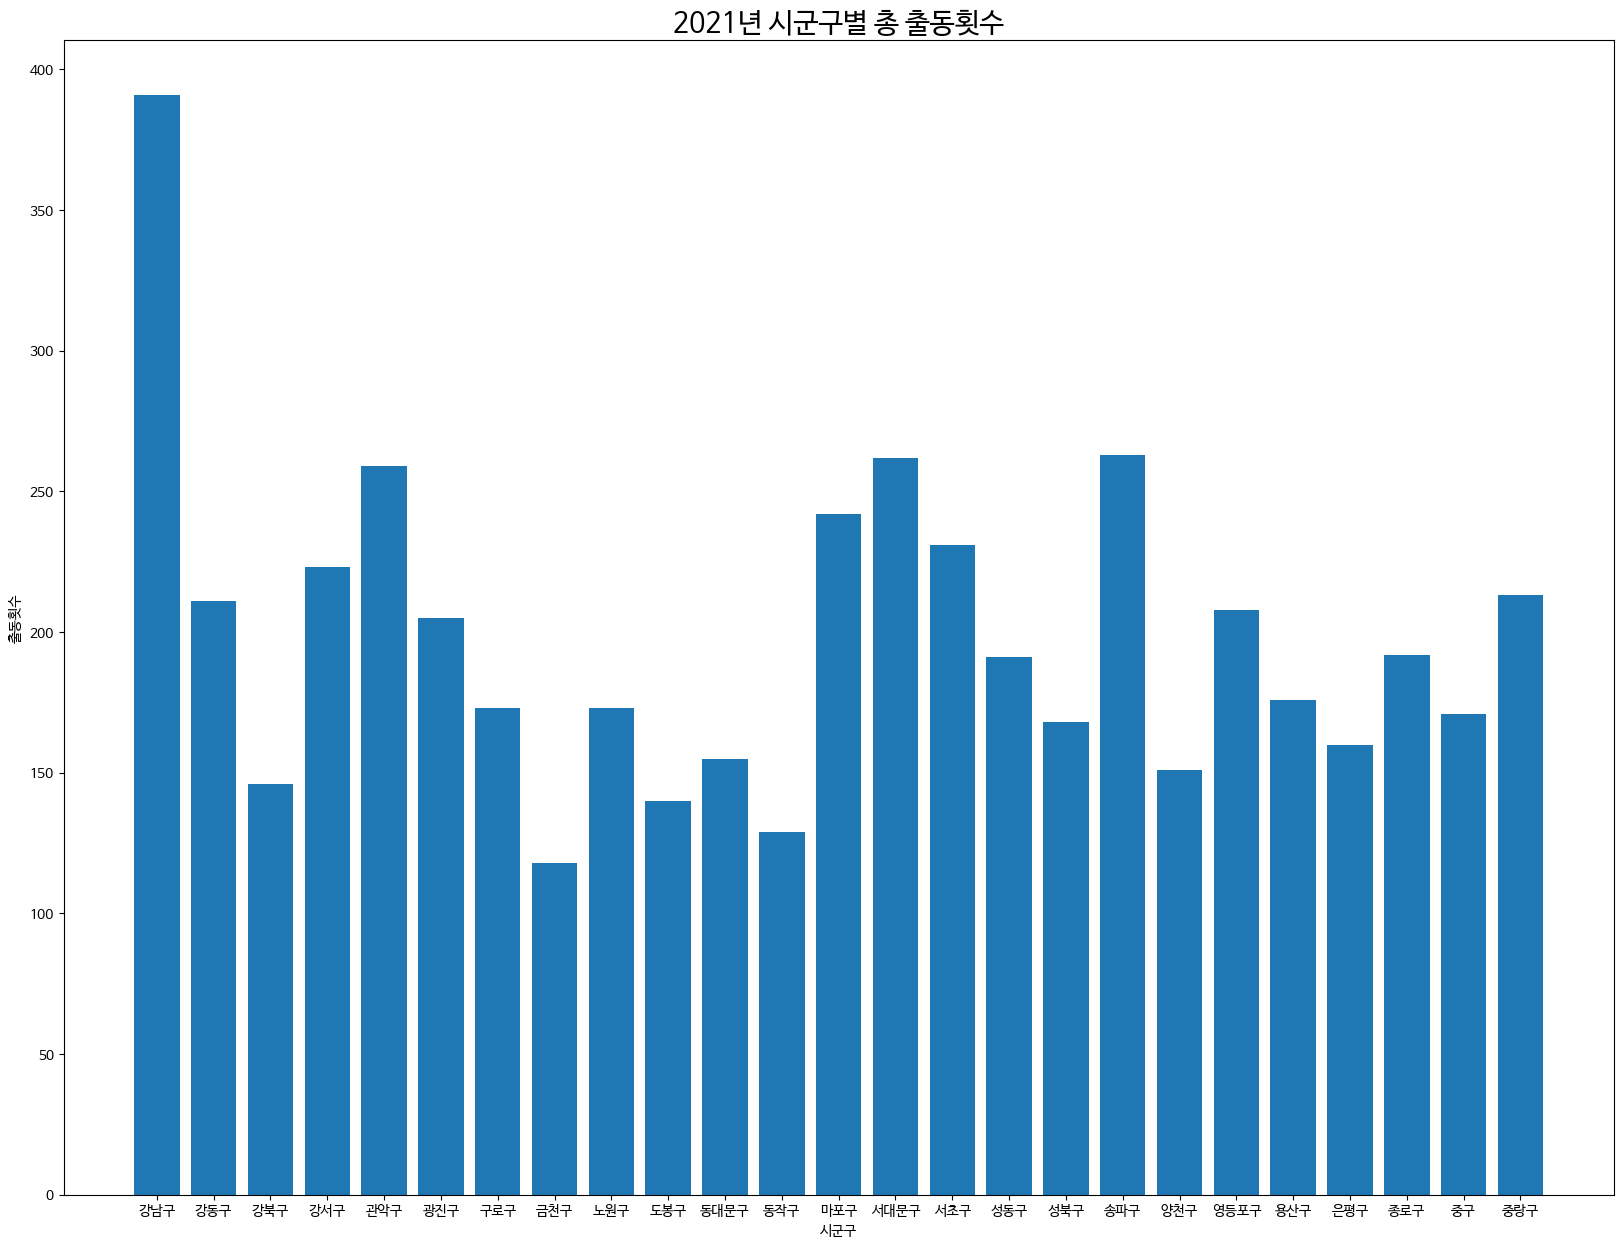

In [ ]:
fig = plt.figure(figsize = (20, 15))
plt.bar("시군구", "총출동횟수", data = sub_dat)

plt.title("2021년 시군구별 총 출동횟수",fontsize = 20)
plt.xlabel("시군구")
plt.ylabel("출동횟수")

plt.show()

## 선 그래프
선 그래프는 시간의 흐름 혹은 여러 색상을 이용하여 표현 할 때, 많이 이용되는 그래프이다.

### 5년 동안 서울시 총 출동횟수

- 선 그래프의 첫번째 예시로 연도별 서울시 총 출동횟수를 그려보자. 이를 위해, 처음 읽었던 데이터를 연도별로 총 출동 횟수를 계산해보자.

In [ ]:
sum_dat = final_dat.groupby("화재발생연도")["총출동횟수"].sum()
sum_dat = sum_dat.reset_index()
sum_dat

,화재발생연도,총출동횟수
0,2017,5978
1,2018,6368
2,2019,5881
3,2020,5088
4,2021,4951


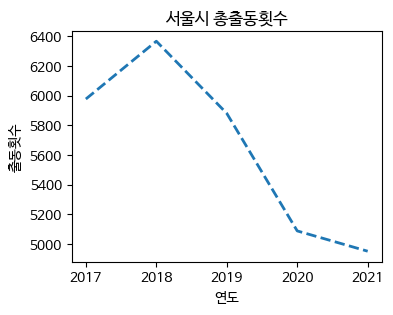

In [ ]:
fig = plt.figure(figsize = (4, 3))

plt.plot(sum_dat["화재발생연도"], sum_dat["총출동횟수"], linestyle = "--", linewidth = 2)

plt.title("서울시 총출동횟수")
plt.xlabel("연도")
plt.ylabel("출동횟수")
plt.show()

### 2017년 여름, 겨울 출동횟수 현황 선 그래프
- 앞의 예시에서는 연도별로 총 출동횟수를 나타내었다. 이번 예시에서는 시군구별로 선 그래프에 색상을 적용하여 여름, 겨울의 출동 횟수를 연도별로 비교해보자. 가장 먼저 2017년의 선 그래프이다.

In [ ]:
tmp_ind = final_dat["화재발생연도"] == 2017
sub_dat = final_dat.loc[tmp_ind, :]
sub_dat

,화재발생연도,시군구,사망자수,부상자수,재산피해금액,총출동횟수,출동횟수_여름,출동횟수_겨울
0,2017,강남구,0,11,1565258,502,120,129
1,2017,강동구,0,12,418593,269,73,63
2,2017,강북구,0,6,339146,186,41,51
3,2017,강서구,3,22,706871,364,81,89
4,2017,관악구,3,20,654690,286,69,82
5,2017,광진구,1,6,433742,200,44,37
6,2017,구로구,1,5,460568,260,71,54
7,2017,금천구,2,7,605549,174,49,33
8,2017,노원구,3,18,566821,279,75,80
9,2017,도봉구,2,6,288836,192,59,37


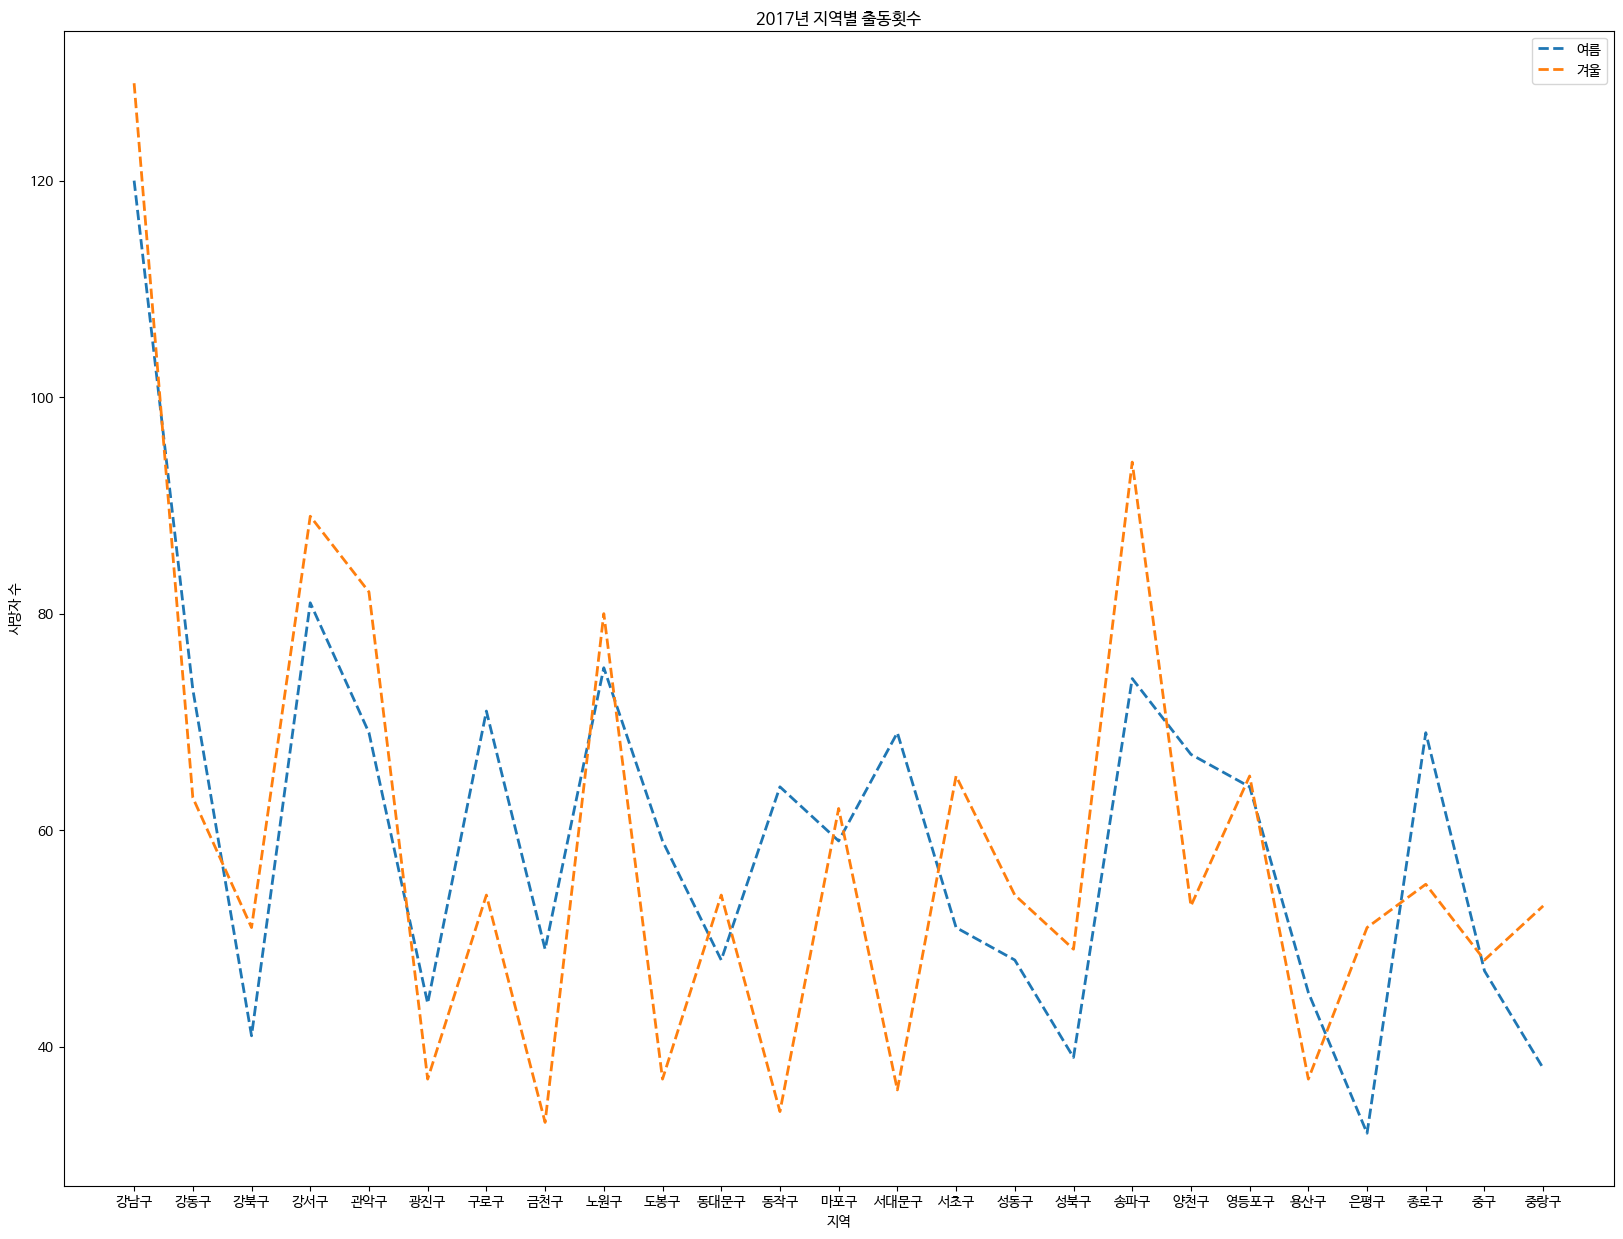

In [ ]:
fig = plt.figure(figsize = (20, 15))

plt.plot(sub_dat["시군구"], sub_dat["출동횟수_여름"], linestyle = "--", linewidth = 2)
plt.plot(sub_dat["시군구"], sub_dat["출동횟수_겨울"], linestyle = "--", linewidth = 2)

plt.legend(["여름", "겨울"], loc = "upper right")

plt.title("2017년 지역별 출동횟수")
plt.xlabel("지역")
plt.ylabel("사망자 수")
plt.show()

### 2019년 여름, 겨울 출동횟수 현황 선 그래프

같은 방법으로 2019년, 2021년 그래프의 결과는 다음과 같다.

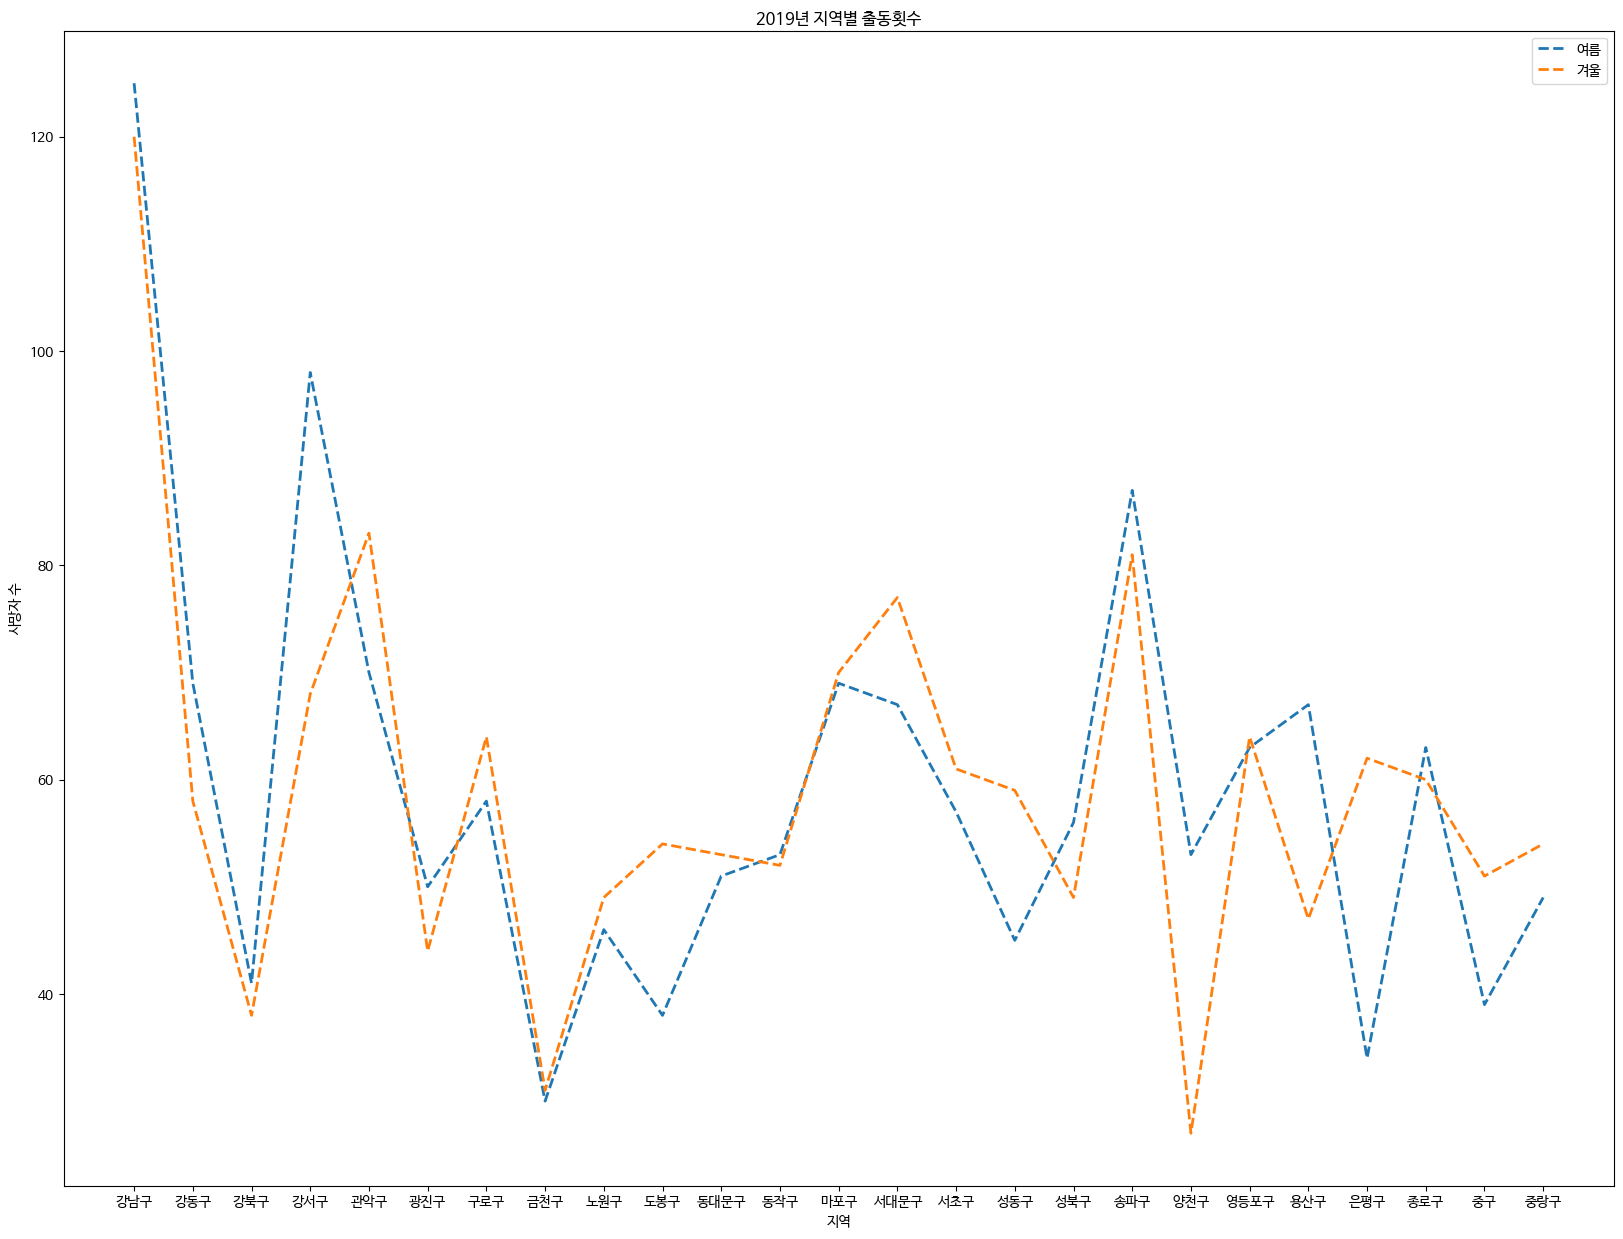

In [ ]:
tmp_ind = final_dat["화재발생연도"] == 2019
sub_dat = final_dat.loc[tmp_ind, :]

fig = plt.figure(figsize = (20, 15))

plt.plot(sub_dat["시군구"], sub_dat["출동횟수_여름"], linestyle = "--", linewidth = 2)
plt.plot(sub_dat["시군구"], sub_dat["출동횟수_겨울"], linestyle = "--", linewidth = 2)

plt.legend(["여름", "겨울"], loc = "upper right")

plt.title("2019년 지역별 출동횟수")
plt.xlabel("지역")
plt.ylabel("사망자 수")
plt.show()

### 2021년 여름, 겨울 출동횟수 현황 선 그래프

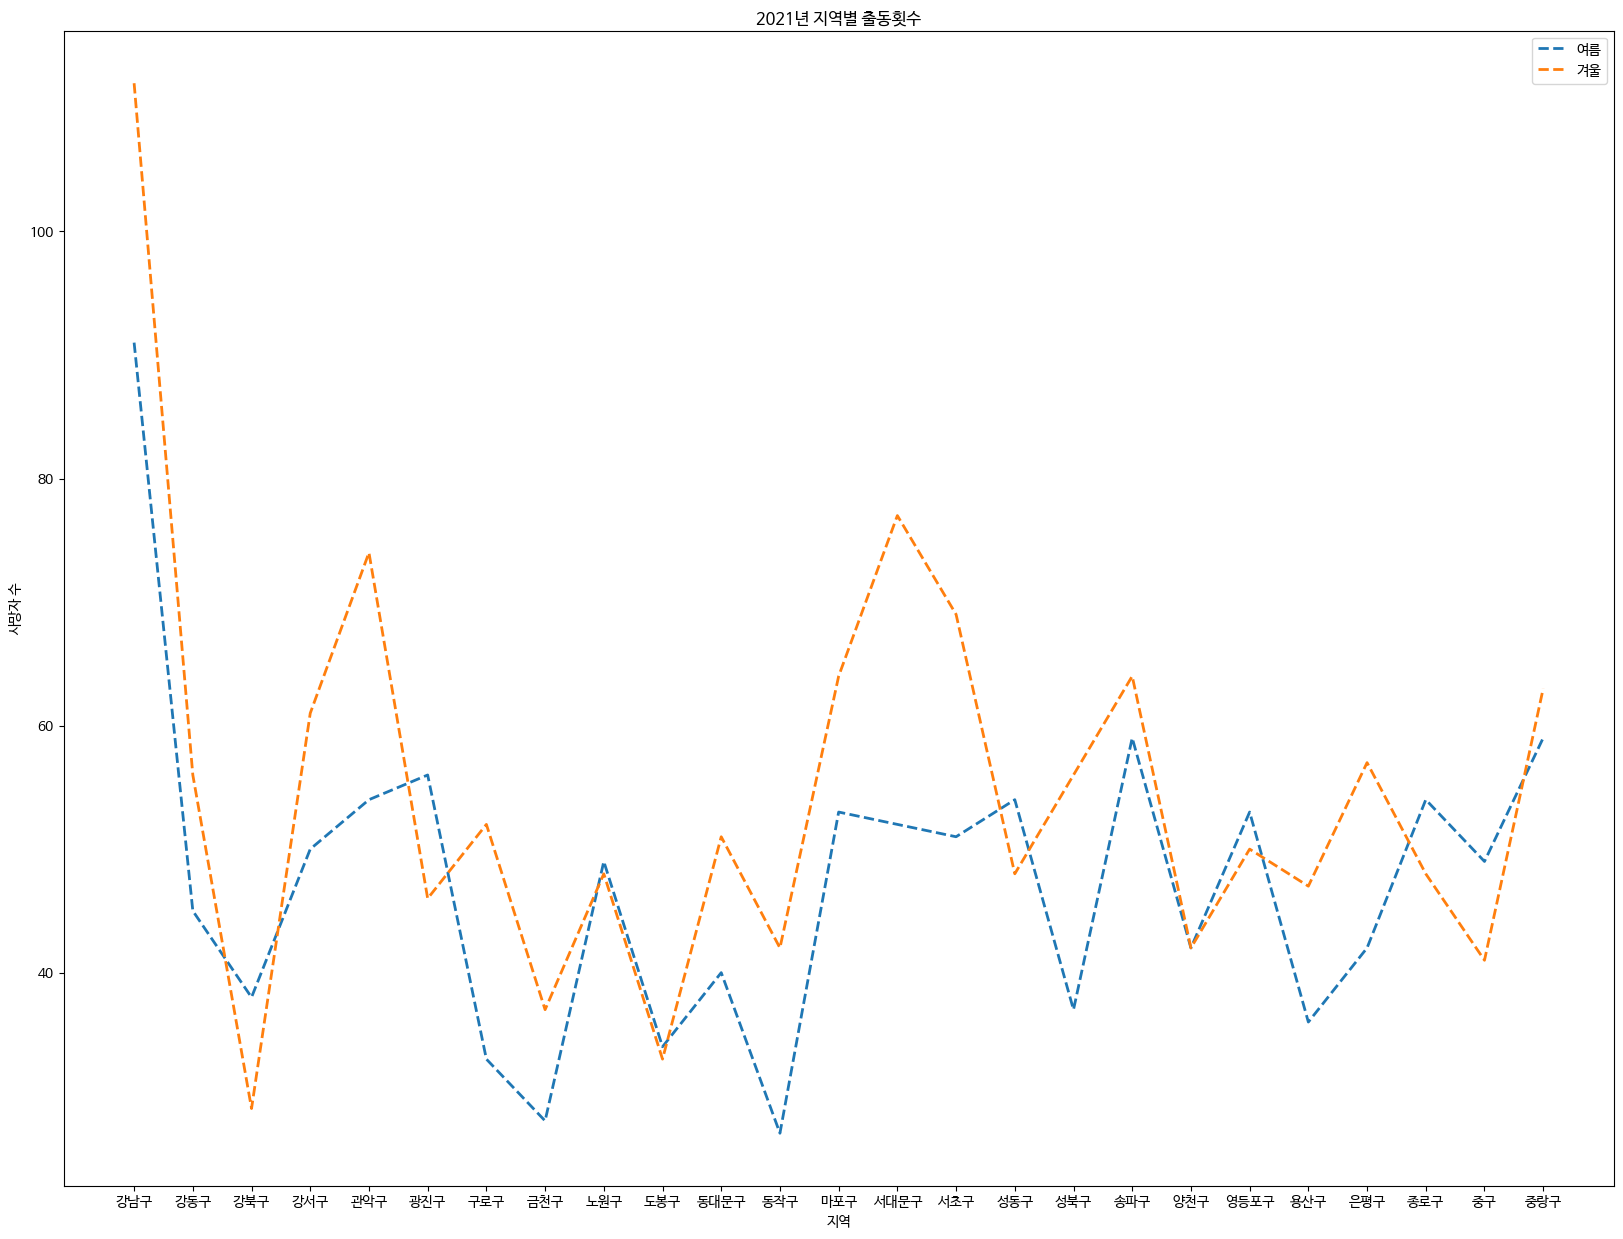

In [ ]:
tmp_ind = final_dat["화재발생연도"] == 2021
sub_dat = final_dat.loc[tmp_ind, :]

fig = plt.figure(figsize = (20, 15))

plt.plot(sub_dat["시군구"], sub_dat["출동횟수_여름"], linestyle = "--", linewidth = 2)
plt.plot(sub_dat["시군구"], sub_dat["출동횟수_겨울"], linestyle = "--", linewidth = 2)

plt.legend(["여름", "겨울"], loc = "upper right")

plt.title("2021년 지역별 출동횟수")
plt.xlabel("지역")
plt.ylabel("사망자 수")
plt.show()

## 산점도

산점도는 두 변수의 값을 하나의 점으로 표현하여 좌표평면에 나타내는 그래프이다. 그렇기에 두 변수의 관계를 살펴볼때 유용하게 사용된다.

이번 예시에서는 총출동횟수와 재산피해 금액, 부상자수에 대해 어떠한 관계가 존재하는지 산점도로 확인해보자.

### 2017년도 총 출동횟수와 재산피해금액, 부상자수에 대한 산점도

In [ ]:
final_dat

,화재발생연도,시군구,사망자수,부상자수,재산피해금액,총출동횟수,출동횟수_여름,출동횟수_겨울
0,2017,강남구,0,11,1565258,502,120,129
1,2017,강동구,0,12,418593,269,73,63
2,2017,강북구,0,6,339146,186,41,51
3,2017,강서구,3,22,706871,364,81,89
4,2017,관악구,3,20,654690,286,69,82
...,...,...,...,...,...,...,...,...
120,2021,용산구,0,5,296793,176,36,47
121,2021,은평구,3,8,875722,160,42,57
122,2021,종로구,0,12,465499,192,54,48
123,2021,중구,0,16,2780374,171,49,41


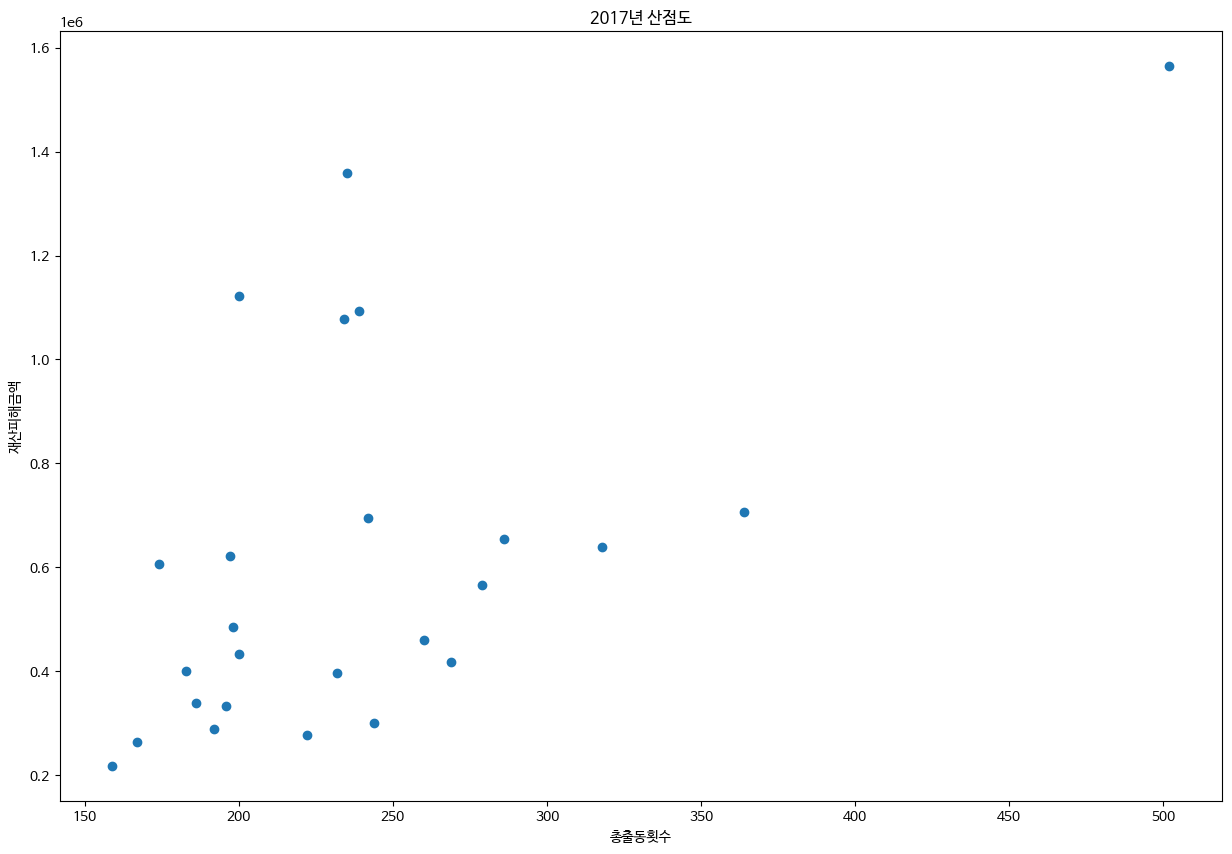

In [ ]:
fig = plt.figure(figsize = (15, 10))

tmp_ind = final_dat["화재발생연도"] == 2017
plt.scatter("총출동횟수", "재산피해금액", data = final_dat.loc[tmp_ind, :])

plt.title("2017년 산점도")
plt.xlabel("총출동횟수")
plt.ylabel("재산피해금액")

plt.show()

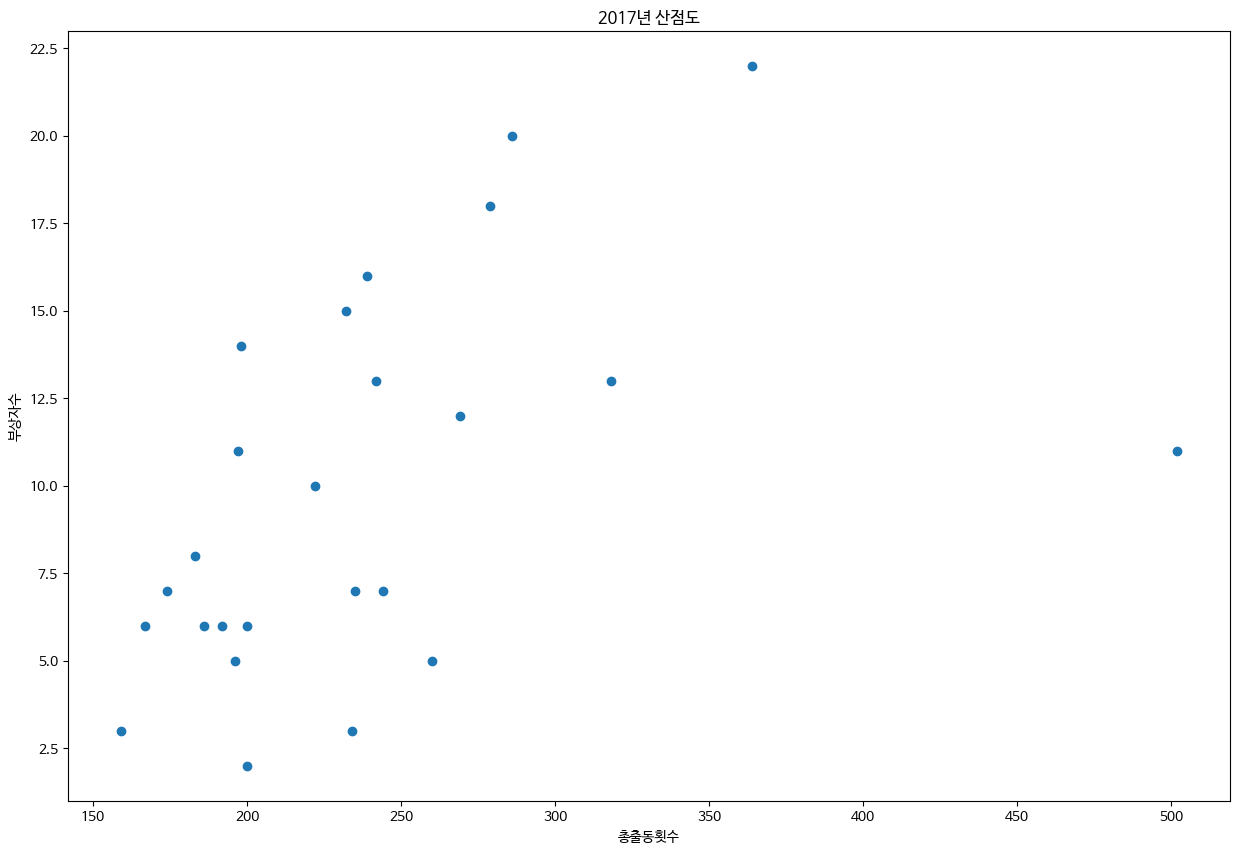

In [ ]:
fig = plt.figure(figsize = (15, 10))

tmp_ind = final_dat["화재발생연도"] == 2017
plt.scatter("총출동횟수", "부상자수", data = final_dat.loc[tmp_ind, :])

plt.title("2017년 산점도")
plt.xlabel("총출동횟수")
plt.ylabel("부상자수")

plt.show()

- 위 그래프를 보면, 2017년도에는 두 변수들 간에 증가하는 추세가 존재한다. 즉, 총 출동횟수가 증가한다면, 부상자수 혹은 재산피해금액 또한 증가하는 형태를 가지고 있다. 이를 2021년에 대해서도 살펴보자.

### 2021년도 총 출동횟수와 재산피해금액, 부상자수에 대한 산점도

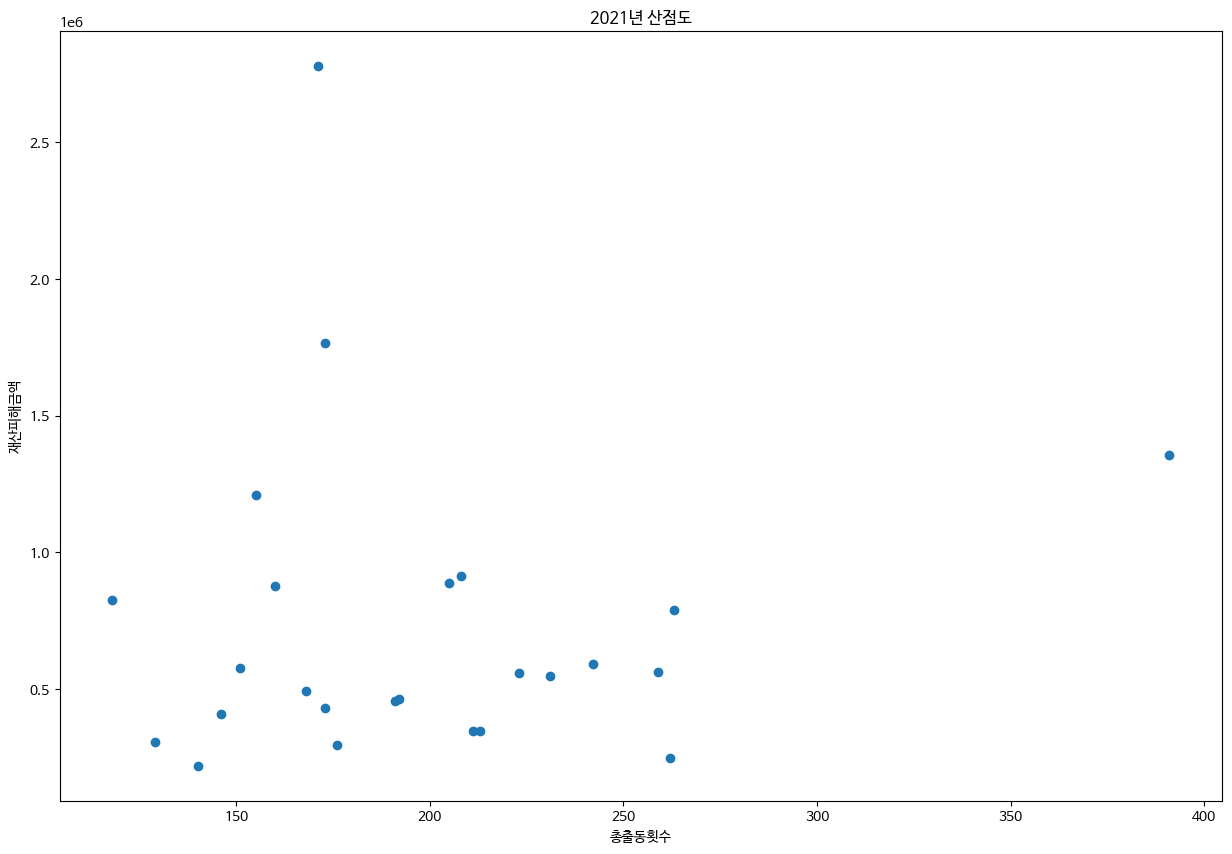

In [ ]:
fig = plt.figure(figsize = (15, 10))

tmp_ind = final_dat["화재발생연도"] == 2021
plt.scatter("총출동횟수", "재산피해금액", data = final_dat.loc[tmp_ind, :])

plt.title("2021년 산점도")
plt.xlabel("총출동횟수")
plt.ylabel("재산피해금액")

plt.show()

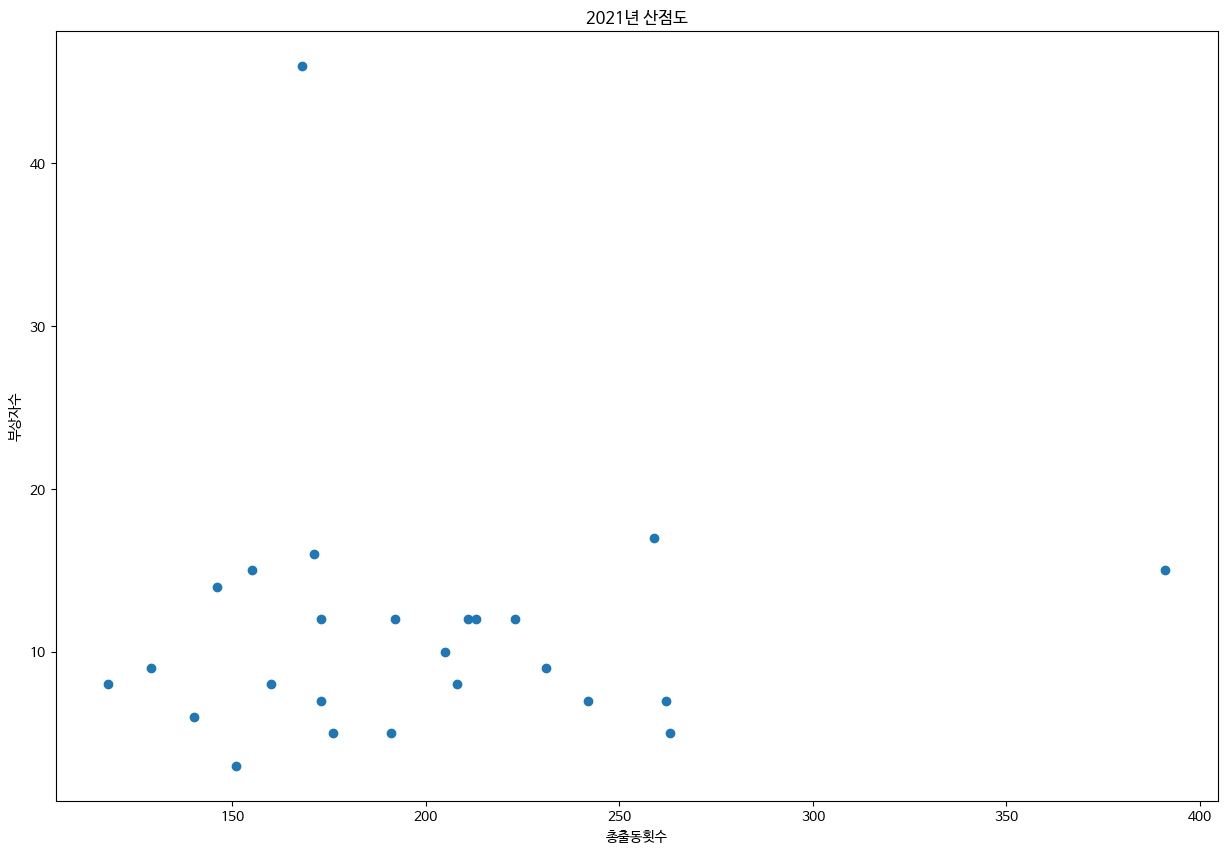

In [ ]:
fig = plt.figure(figsize = (15, 10))

tmp_ind = final_dat["화재발생연도"] == 2021
plt.scatter("총출동횟수", "부상자수", data = final_dat.loc[tmp_ind, :])

plt.title("2021년 산점도")
plt.xlabel("총출동횟수")
plt.ylabel("부상자수")

plt.show()

- 2021년의 경우, 2017년에 비해, 총출동횟수가 증가한다고 해서 부상자 수 및 재산피해금액이 증가하는 형태를 나타내지 않고 있다. 이러한 이유는 재산피해금액은 $1.5*10^6$이상, 부상자수에서는 30명 이상이 값이 1개 혹은 2개 밖에 존재하지 않는데, 이 값들에 의해 그래프의 모양이 망가지기 때문에 증가하는 형태가 눈에 띄지 않는것이다.

- 이러한 이상값들을 제거하고 살펴보면 다음과 같이 나타난다.

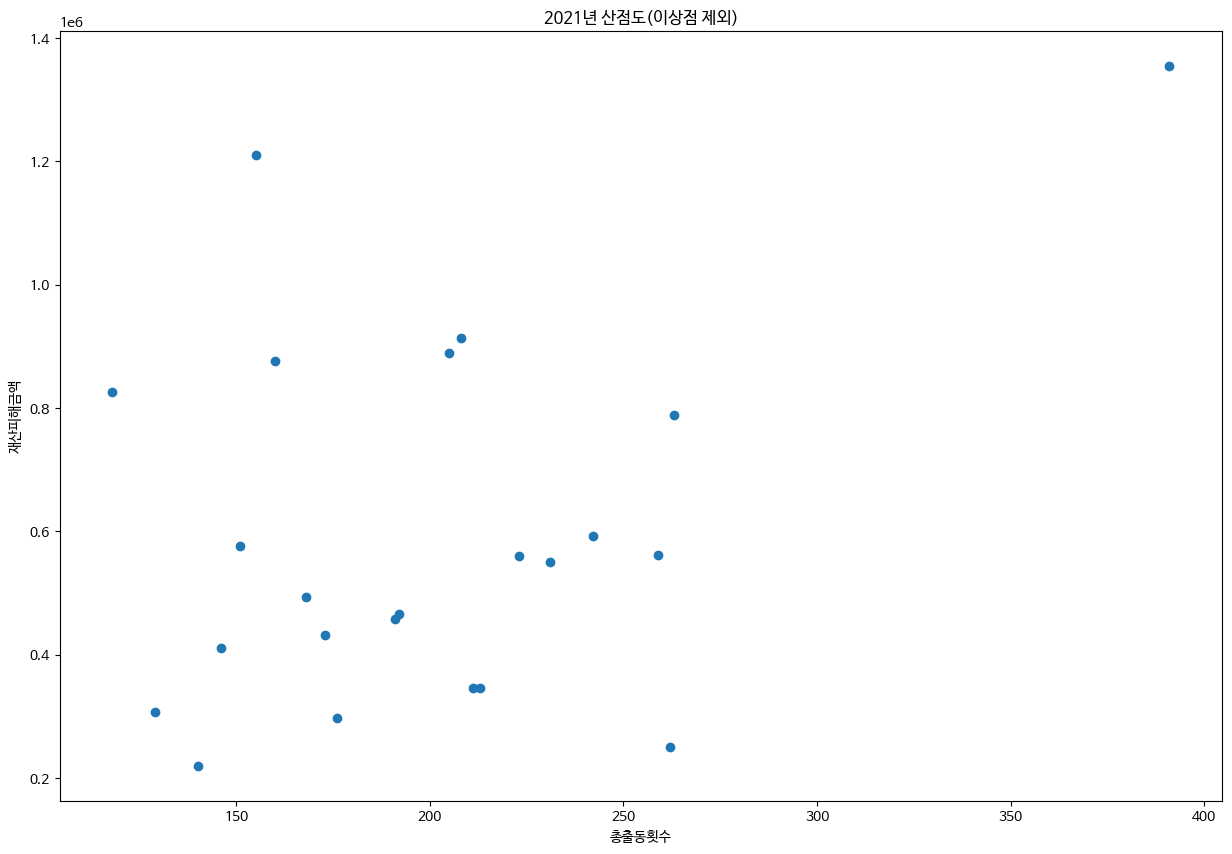

In [ ]:
fig = plt.figure(figsize = (15, 10))

tmp_ind = (final_dat["화재발생연도"] == 2021) & (final_dat["재산피해금액"] <= 1.5*1e+6)
plt.scatter("총출동횟수", "재산피해금액", data = final_dat.loc[tmp_ind, :])

plt.title("2021년 산점도(이상점 제외)")
plt.xlabel("총출동횟수")
plt.ylabel("재산피해금액")

plt.show()

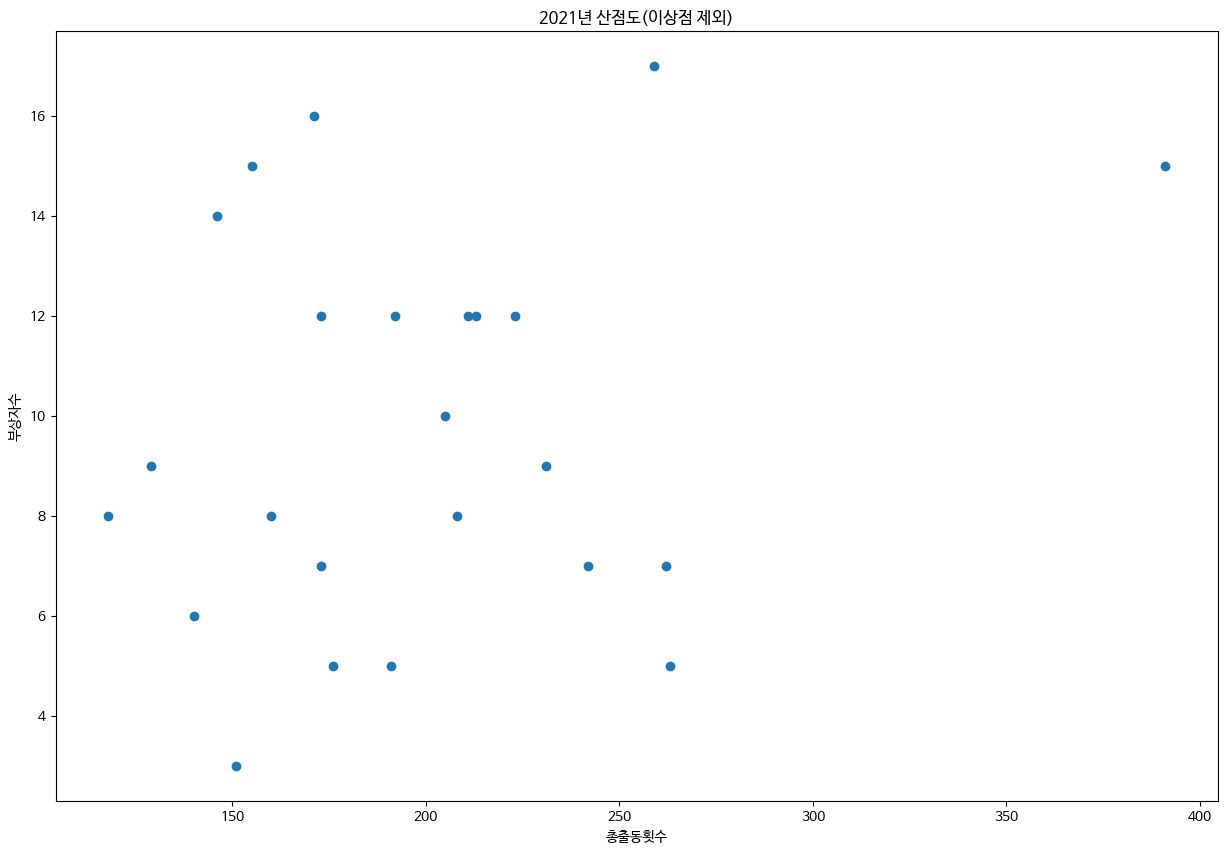

In [ ]:
fig = plt.figure(figsize = (15, 10))

tmp_ind = (final_dat["화재발생연도"] == 2021) & (final_dat["부상자수"] <= 30)
plt.scatter("총출동횟수", "부상자수", data = final_dat.loc[tmp_ind, :])

plt.title("2021년 산점도(이상점 제외)")
plt.xlabel("총출동횟수")
plt.ylabel("부상자수")

plt.show()

- 이상값들을 제거한 결과, 2017년에 비해 증가하는 추세가 존재하는 것 처럼 보이지 않는다.
즉, 2021년은 2017년에 비해 총 출동횟수는 감소하고, 나머지 두 변수에는 변화가 크지 않았지만, 두 변수간의 추세는 존재하지 않는다.

--------------------------------------------------------------------------------

In [ ]:
from IPython.display import Image

# 공간자료 시각화

## 공간데이터

1. 공간 자료(공간 데이터)란 각 관측치마다 공간에 대한 정보를 가지고 있는 데이터이며, 공간 정보(위치 정보)는 위도(lattitude)와 경도(longitude)로 표현한다.

2. 위경도는 지리 좌표계(Geographic coordinate system)을 기반으로 생성된다. ex) TM 좌표계(EPSG:2097), WGS84좌표계(EPSG:4326), UTM-K좌표계(EPSG:5179)등이 존재한다.

![위경도](https://github.com/UOS-Bigdata/lab_fire_seoul/blob/main/images/long_lat_image.jpeg?raw=true)

3. 같은 위경도 좌표더라도 각 좌표계에 따라 다른 값을 가진다. 그러므로 공간데이터를 다루는데 있어 가장 중요한 것이 이 좌표계이다.

4. 예를들어, 서울 롯데타워의 위치의 좌표는 각 좌표계에 따라 다음과 같이 나타난다.
    1) 위도 : 37.67777777777778 N, 경도 : 127.09805555555555 E
    2) TM좌표계 : (565937.9846, 32211.3849)
    3) UTM-K좌표계 : (1964325.7452, 964556.428)
    
5. 공간 정보는 지도에 위치를 표현할때, 기본적으로 점(point)로 표현을 한다. 또한 이 점들을 연결하여 선(line), 이 선들을 연결한 다각형(polygon)형태로 저장된다. 이 개념은 다음의 그림으로 표현할 수 있다.

![기본](https://github.com/UOS-Bigdata/lab_fire_seoul/blob/main/images/basic_element.png?raw=true)

파이썬에서는 이런 공간데이터를 다루기 위해 geopandas 패키지가 구현되어 있고, 좌표계를 다루기 위해 pyproj 패키지가 구현되어 있다.

## 사용할 패키지 불러오기

In [ ]:
import pandas as pd
import geopandas as gpd
import pyproj
from pyproj import crs
import matplotlib.pyplot as plt

## 좌표계가 포함된 데이터 읽기

- 화재출동 현황 데이터를 이용하여 좌표를 입력하고, 이를 지도에 표현해 보자.

In [ ]:
fire_dat = pd.read_csv("https://raw.githubusercontent.com/UOS-Bigdata/lab_fire_seoul/main/data/fire.csv")
fire_dat.columns

Index(['wrinvstg_no', 'fire_type_nm', 'buld_srtfrm', 'buld_strctr',
       'buld_srtrf', 'buld_strct_dong_cnt', 'ground_nof', 'bstory_cnt',
       'totar', 'bottom_area', 'buld_sttus_nm', 'dth_cnt', 'injpsn_cnt',
       'dth_hnl_dmge_cnt', 'prprty_dmge_amt', 'fire_ocrn_yr', 'season_se_nm',
       'qtr_se', 'fire_ocrn_ymd', 'fire_ocrn_tm', 'fire_ocrn_mnth',
       'fire_ocrn_day', 'fire_ocrn_hour', 'fire_ocrn_min', 'daywk', 'frstt_nm',
       'ward_nm', 'lfdau_nm', 'dsp_reqre_time', 'fire_supesn_time', 'sido_nm',
       'sigungu_nm', 'emd_nm', 'cty_frmvl_se_nm', 'emd_se_nm', 'gis_x_axis',
       'gis_y_axis', 'longitude', 'la', 'spt_frstt_dist',
       'spt_safe_cnter_dist', 'spt_lfdau_dist', 'ign_htsrc_nm',
       'ign_htsrc_sclas_nm', 'ign_fctr_lclas_nm', 'ign_fctr_sclas_nm',
       'frst_igobj_lclas_nm', 'frst_igobj_sclas_nm', 'ign_mhrls_lclas_nm',
       'ign_mhrls_sclas_nm', 'cmbs_expobj_lclas_nm', 'cmbs_expobj_sclas_nm',
       'fclty_place_lclas_nm', 'fclty_place_mclas_nm', 'fclt

- 화재출동 현황 데이터를 보면, `longitude`변수, `la`변수가 각각 경도, 위도를 의미하는 변수이다.

In [ ]:
fire_dat.crs

AttributeError: 'DataFrame' object has no attribute 'crs'

- 데이터를 읽었을때, 데이터에 좌표계가 존재하지 않기 때문에 crs(Coordinate Reference System)함수가 에러를 나타낸다. 하지만, 좌표계가 있는데 왜 이런 에러를 발생시킬까??

- 데이터에 저장되있는 좌표는 컴퓨터 기준에서 단순 숫자에 지나지 않는다. 즉, `fire_dat`데이터 프레임에 저장된 `la`변수에 저장된 값 37.552875는 그냥 숫자일 뿐 좌표가 아니다. 그러므로, 이 숫자가 좌표라는 것을 입력해줘야 한다.

- 화재출동 현황 데이터에 있는 변수 `longitude`와 `la`는 EPSG:4326 좌표계를 의미한다.. 그러므로 변수들 `la`(위도), `longitude`(경도)를 좌표계로 지정해 준다.

In [ ]:
fire_dat = gpd.GeoDataFrame(fire_dat, geometry = gpd.points_from_xy(fire_dat["longitude"], fire_dat["la"]), crs = "EPSG:4326")

In [ ]:
fire_dat.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

- `geopandas` 패키지에 `GeoDataFrame`함수를 이용하여 geometry 정보를 입력하는 방법이다. 위 데이터에서는 위도는 `la`, 경도는 `longitude`으로 입력하고, crs함수를 이용해 확인하였다.

- 이제 위경도를 입력한 데이터에 전국 법정동 좌표를 가져와 데이터를 합쳐서 그림을 표현하자.

## 전국 법정동 좌표 정보 데이터

- 예시로 사용하기위한 서울특별시 법정동 좌표 데이터는 shp파일로 저장되어 있다.

- shp 파일 : csv, xlsx과 다르게 위치 정보(geometry)를 포함하고 있는 파일로, 확장자가 dbf, prj, shp, shx 4가지 파일이 모두 있어야 사용 가능하다. (prj는 없어도 가능, 이유는 prj파일이 좌표계 정보를 가지고 있는 파일이기 때문이다.)

In [ ]:
seoul_map = gpd.read_file("https://raw.githubusercontent.com/UOS-Bigdata/lab_fire_seoul/main/data/seoul_shp.shp")

- seoul_map 데이터의 정보는 다음과 같다.

In [ ]:
seoul_map.info()
seoul_map

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   fid         467 non-null    float64 
 1   bjd_code    467 non-null    float64 
 2   shape_area  467 non-null    float64 
 3   sido        467 non-null    object  
 4   si          467 non-null    object  
 5   sgg         467 non-null    object  
 6   bjd         467 non-null    object  
 7   geometry    467 non-null    geometry
dtypes: float64(3), geometry(1), object(4)
memory usage: 29.3+ KB


,fid,bjd_code,shape_area,sido,si,sgg,bjd,geometry
0,1.0,1.111010e+09,7.926179e+05,서울특별시,종로구,종로구,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,2.0,1.111010e+09,9.882172e+04,서울특별시,종로구,종로구,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,3.0,1.111010e+09,7.327165e+04,서울특별시,종로구,종로구,궁정동,"POLYGON ((953560.228 1954257.466, 953561.190 1..."
3,4.0,1.111010e+09,5.940365e+04,서울특별시,종로구,종로구,효자동,"POLYGON ((953519.843 1953890.785, 953518.489 1..."
4,5.0,1.111010e+09,5.939929e+04,서울특별시,종로구,종로구,창성동,"POLYGON ((953516.123 1953734.362, 953516.526 1..."
...,...,...,...,...,...,...,...,...
462,463.0,1.174011e+09,4.690167e+06,서울특별시,강동구,강동구,암사동,"POLYGON ((968514.203 1950677.234, 968505.336 1..."
463,464.0,1.174011e+09,3.057341e+06,서울특별시,강동구,강동구,천호동,"POLYGON ((968336.280 1950222.697, 968337.437 1..."
464,465.0,1.174011e+09,1.956188e+06,서울특별시,강동구,강동구,성내동,"POLYGON ((967686.073 1948534.011, 967685.029 1..."
465,466.0,1.174010e+09,1.611551e+06,서울특별시,강동구,강동구,길동,"POLYGON ((969147.362 1949613.535, 969164.491 1..."


## 지도에 화재 사고 표시

- 이제, 화재출동 현황데이터를 법정동 지도 위에 나타내보자. 우선 서울 전체가 아닌 은평구에 대해서만 추출하여 표현해보자. 법정동 지도 데이터 및 화재출동 현황자료에서 은평구만 뽑는다.

In [ ]:
tmp_ind = fire_dat["sigungu_nm"] == "은평구"
jg_fire_dat = fire_dat.loc[tmp_ind, :]

jg_fire_dat.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
tmp_ind = seoul_map["sgg"] == "은평구"
jg_map_dat = seoul_map.loc[tmp_ind, :]

jg_map_dat.crs

<Projected CRS: EPSG:5179>
Name: KGD2002 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Korean Geodetic Datum 2002
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

- 하지만, 두 데이터의 좌표계는 서로 다름을 확인 할 수 있다. 이는 맨 처음 설명했듯이, 위치는 같은 곳을 의미하지만, 다른 지도에서의 좌표를 의미한다. 그러므로 이 둘의 좌표계를 맞춘다.

- 이를 위해 jg_fire_dat의 좌표계를 "EPSG:5179"좌표계로 맞춘다.

In [ ]:
jg_fire_dat = jg_fire_dat.to_crs(5179)

jg_fire_dat.crs

<Projected CRS: EPSG:5179>
Name: KGD2002 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Korean Geodetic Datum 2002
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

- 좌표가 "EPSG:5179"로 맞춰진것을 알 수 있다. 따라서, 이를 그림으로 그리면 다음과 같다.

<Axes: >

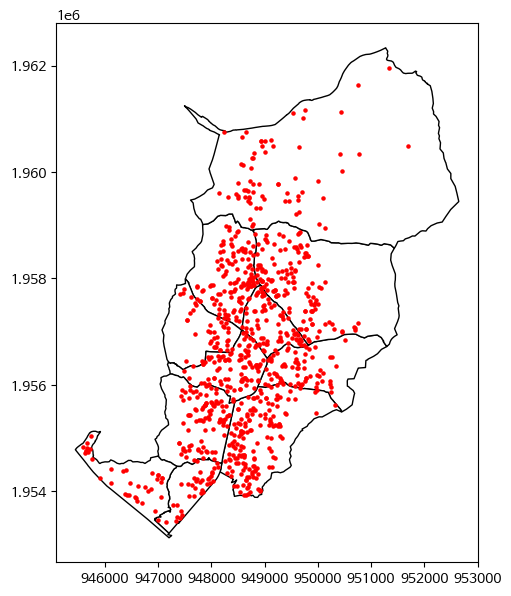

In [ ]:
fig, ax = plt.subplots(figsize = (7, 7))
jg_map_dat.plot(ax = ax, linewidth = 1, edgecolor = "black", facecolor = "white")
jg_fire_dat.plot(ax = ax, color = "red", markersize = 5)

- 즉, 위 그림은 서울특별시 은평구에 법정동 단위로 2017년부터 2021년까지 화재가 발생한 위치를 나타낸 지도이다. 이를 2021년에 대해 서울 전역으로 살펴보자.

<Axes: >

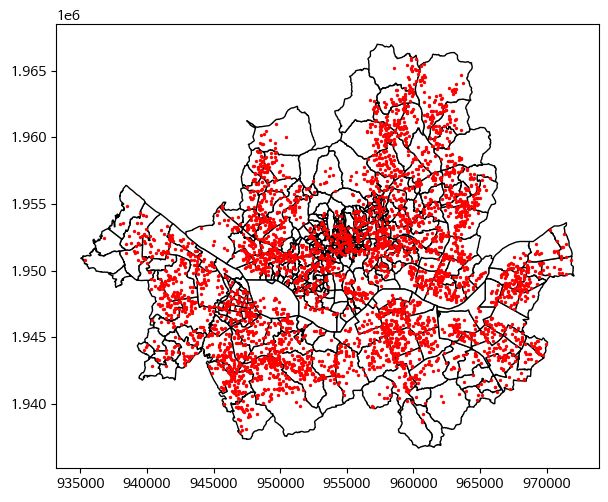

In [ ]:
fire_dat = fire_dat.to_crs(5179)

tmp_ind = fire_dat["fire_ocrn_yr"] == 2021
sub_fire_dat = fire_dat.loc[tmp_ind, :]

fig, ax = plt.subplots(figsize = (7, 7))
seoul_map.plot(ax = ax, linewidth = 1, edgecolor = "black", facecolor = "white")
sub_fire_dat.plot(ax = ax, color = "red", markersize = 2)

- 이 중, 여름과 겨울을 구분하여 점으로 표현하면 다음 그래프로 나타난다.

<Axes: >

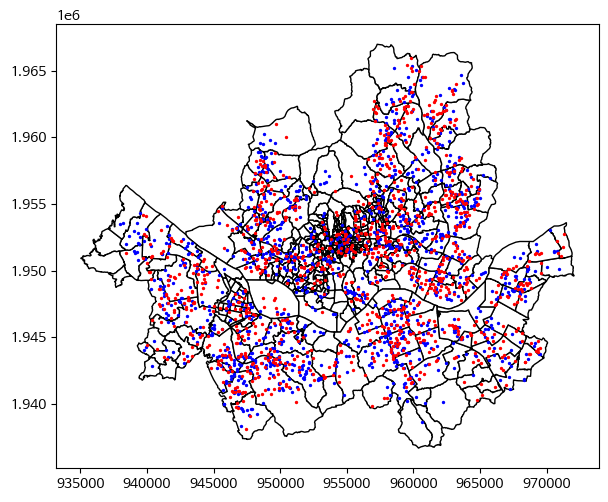

In [ ]:
sum_ind = sub_fire_dat["season_se_nm"] == "여름"
sum_fire_dat = sub_fire_dat.loc[sum_ind, :]

win_ind = sub_fire_dat["season_se_nm"] == "겨울"
win_fire_dat = sub_fire_dat.loc[win_ind, :]

fig, ax = plt.subplots(figsize = (7, 7))
seoul_map.plot(ax = ax, linewidth = 1, edgecolor = "black", facecolor = "white")
win_fire_dat.plot(ax = ax, color = "blue", markersize = 2)
sum_fire_dat.plot(ax = ax, color = "red", markersize = 2)

- 다음으로, 점 그래프가 아닌 그 값에 따른 값을 지도에 채우는 것을 그려보자. 이번 예제는 2021년에 총 출동횟수를 각 법정동별로 나타내보자. 출동한 연도를 나타낸 변수는 `fire_ocrn_yr`이다.

In [ ]:
year_ind = fire_dat["fire_ocrn_yr"] == 2021
year_dat = fire_dat.loc[year_ind, :]

In [ ]:
year_dat["count"] = 1

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


- `groupby`,`sum`메소드들을 이용하여 2021년에 법정동에 대해 총 출동횟수를 계산한다.

In [ ]:
count_dat = year_dat.groupby(["sido_nm", "sigungu_nm", "emd_nm"])["count"].sum()
count_dat = count_dat.reset_index()

In [ ]:
count_dat

,sido_nm,sigungu_nm,emd_nm,count
0,서울특별시,강남구,개포동,30
1,서울특별시,강남구,논현동,78
2,서울특별시,강남구,대치동,39
3,서울특별시,강남구,도곡동,18
4,서울특별시,강남구,삼성동,42
...,...,...,...,...
389,서울특별시,중랑구,면목동,81
390,서울특별시,중랑구,묵동,23
391,서울특별시,중랑구,상봉동,30
392,서울특별시,중랑구,신내동,18


- `merge`함수를 이용하여 두 데이터(법정동 지도 데이터, 법정동별 출동건수 데이터)를 merge하는데, 기준이 되는 변수는 각각 `sido, sgg, bjd`, `sido_nm`, `sigungu_nm`, `emd_nm`이다.

In [ ]:
merge_dat = pd.merge(seoul_map, count_dat, left_on = ["sido", "sgg", "bjd"], right_on = ["sido_nm", "sigungu_nm", "emd_nm"])

- 마지막으로 출동횟수에 대한 변수에 대해 그래프를 생성한다.

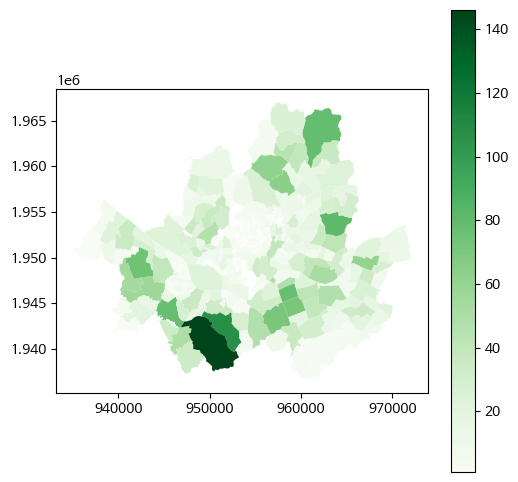

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
ax = merge_dat.plot(column = "count", cmap = "Greens", ax = ax, legend = True)

plt.show()